<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2021 - Homework 02</h1>

<h3 style="color:blue">2021-05-31</h3>

<h3 style="color:blue"> Authors: David Farré Gil, Blai Ras Jimenez, Irene Bonafonte Pardàs </h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exp}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

## Data Reading

In [1]:
data <- read.csv("aug_train.csv")
test <- read.csv("aug_test.csv")

In [2]:
test_response <- read.csv("Test_Response.csv")

In [3]:
test$Response <- test_response$Response

## Data Analysis

### Variables

01. `id`:        id of the subject.   
02. `Gender`:        Sex of the subject.
03. `Age`:         Age of the subject.
04. `Driving License`:      Whether if the subject has or not a driver's license.
05. `Region_Code`:          Coded region name.
06. `Previously_Insured`:      Whether if the subject has already a health insurance.
07. `Vehicle_Age`:  Number of years of the subject's car.
08. `Vehicle_Damage`:   Measure of detriment of the subject's car.
09. `Annual_Premium`:          Number of citations in total.
10. `Policy_Sales_Channel`:      Sum of money that the subject needs to pay regularly to an insurance company.
11. `Vintage`:     Days the subject is insured until now.
12. `Response`: Whether the subject said yes or no to getting a vehicle insurance.

As we can see, we will get rid of the variables `id`, `Region_Code` and `Policy_Sales_Channel` since they do not bring any substantial information towards the goal of predicting whether a customer would be interested in Vehicle Insurance. Even if they did, they should not be used towards that goal, it may even be a case of spurious correlation.

In [4]:
data <- data[c("Gender","Age","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium","Vintage","Response")]

In [5]:
str(data)

'data.frame':	382154 obs. of  9 variables:
 $ Gender            : chr  "Male" "Male" "Female" "Female" ...
 $ Age               : int  22 42 66 22 28 25 51 38 45 42 ...
 $ Driving_License   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Previously_Insured: int  1 0 0 0 1 1 0 1 0 0 ...
 $ Vehicle_Age       : chr  "< 1 Year" "1-2 Year" "1-2 Year" "< 1 Year" ...
 $ Vehicle_Damage    : chr  "No" "Yes" "Yes" "No" ...
 $ Annual_Premium    : num  2630 43327 35841 27645 29023 ...
 $ Vintage           : int  16 135 253 69 211 23 209 51 262 217 ...
 $ Response          : int  0 0 0 0 0 0 0 0 0 1 ...


As we can see, there's a few categorical columns. For the sake of the model creation and training, we will convert them to numerical, e.g. ``Female`` is coded to ``1`` and ``Male`` is coded to  ``0``, thanks to the ``preprocess`` function below.

In [5]:
preprocess <- function(data) {
    data$Vehicle_Age <- as.numeric(factor(data$Vehicle_Age, levels=c('< 1 Year','1-2 Year','> 2 Years')))
    data$Vehicle_Damage <- as.numeric(factor(data$Vehicle_Damage, levels=c('No','Yes'))) 
    data$Gender <- as.numeric(factor(data$Gender))
    return(data)
}

In [6]:
data <- preprocess(data)
test <- preprocess(test)

In [8]:
data[1:5,]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2,22,1,1,1,1,2630,16,0
2,2,42,1,0,2,2,43327,135,0
3,1,66,1,0,2,2,35841,253,0
4,1,22,1,0,1,1,27645,69,0
5,2,28,1,1,1,1,29023,211,0


In [7]:
Num.vars<-c(2,7,8)
Bin.vars<-c(1,3,4,5,6,9)

Let's check the distribution of each variable in the data set:

[1] "Age"
[1] "Annual_Premium"


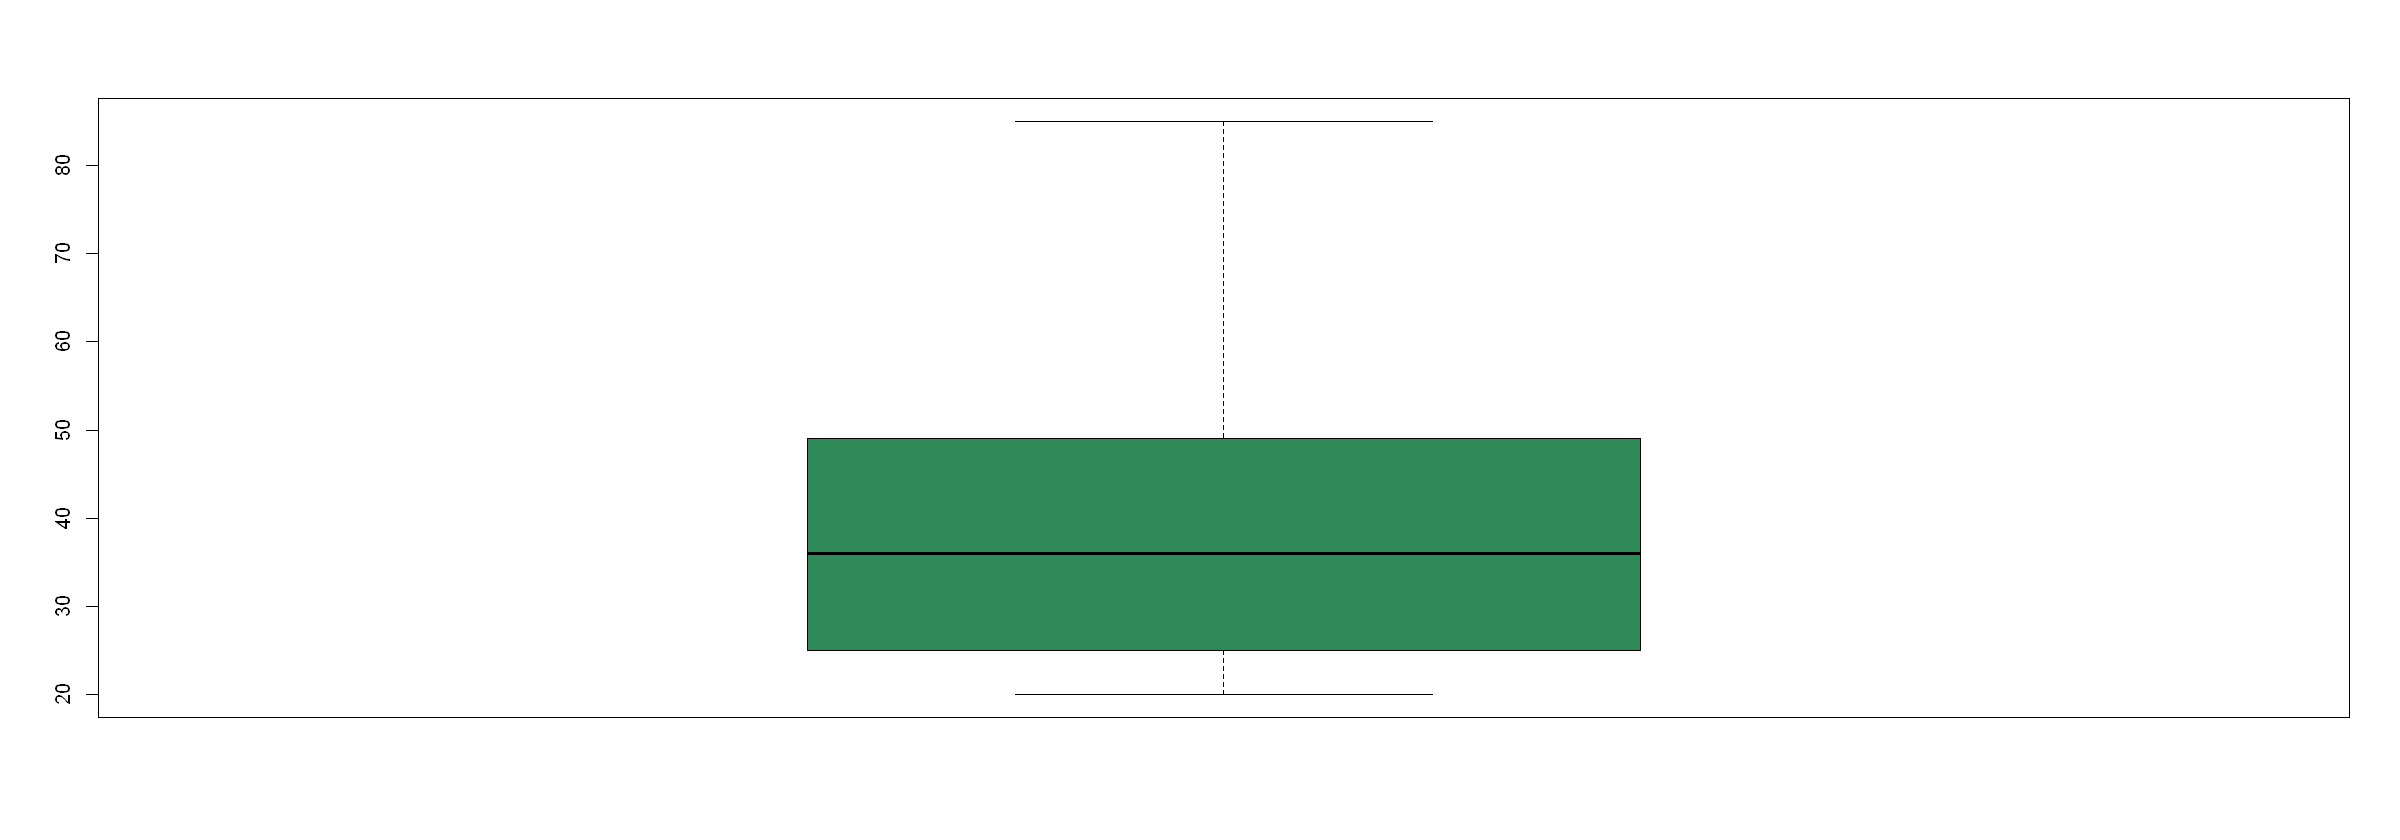

[1] "Vintage"


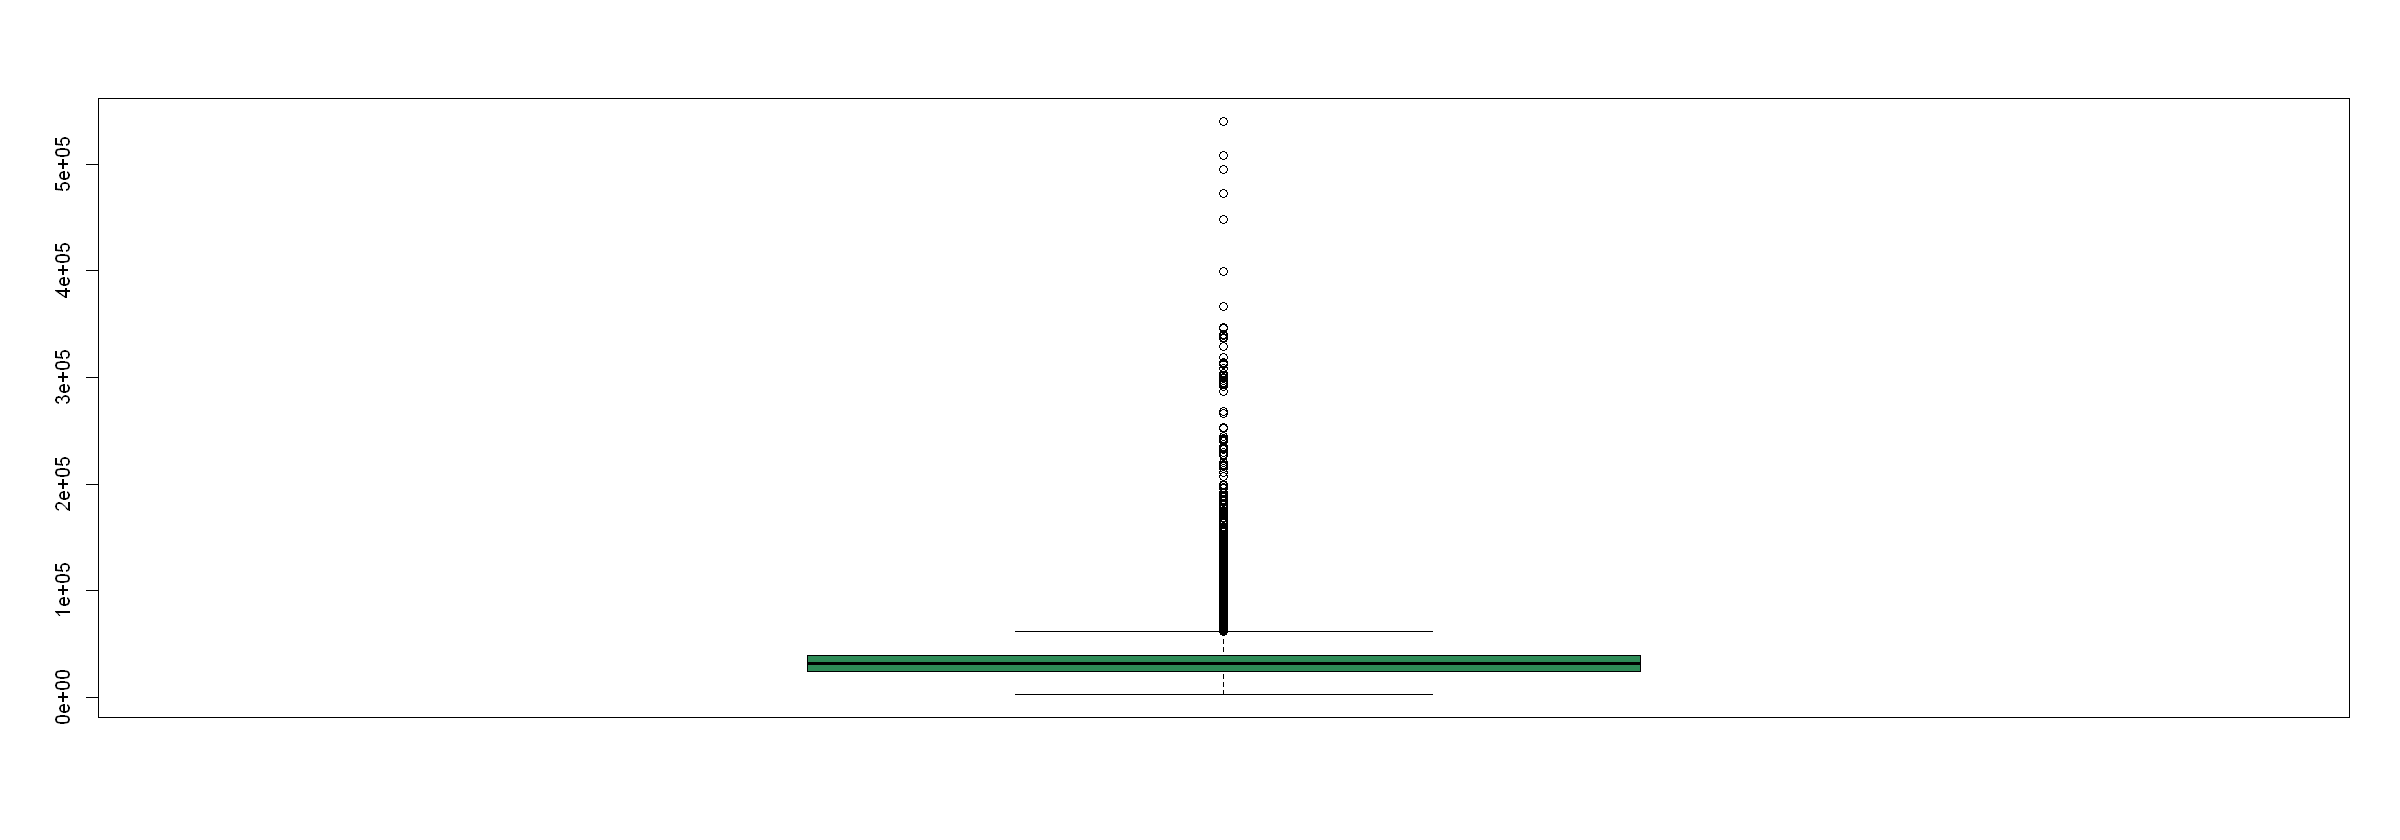

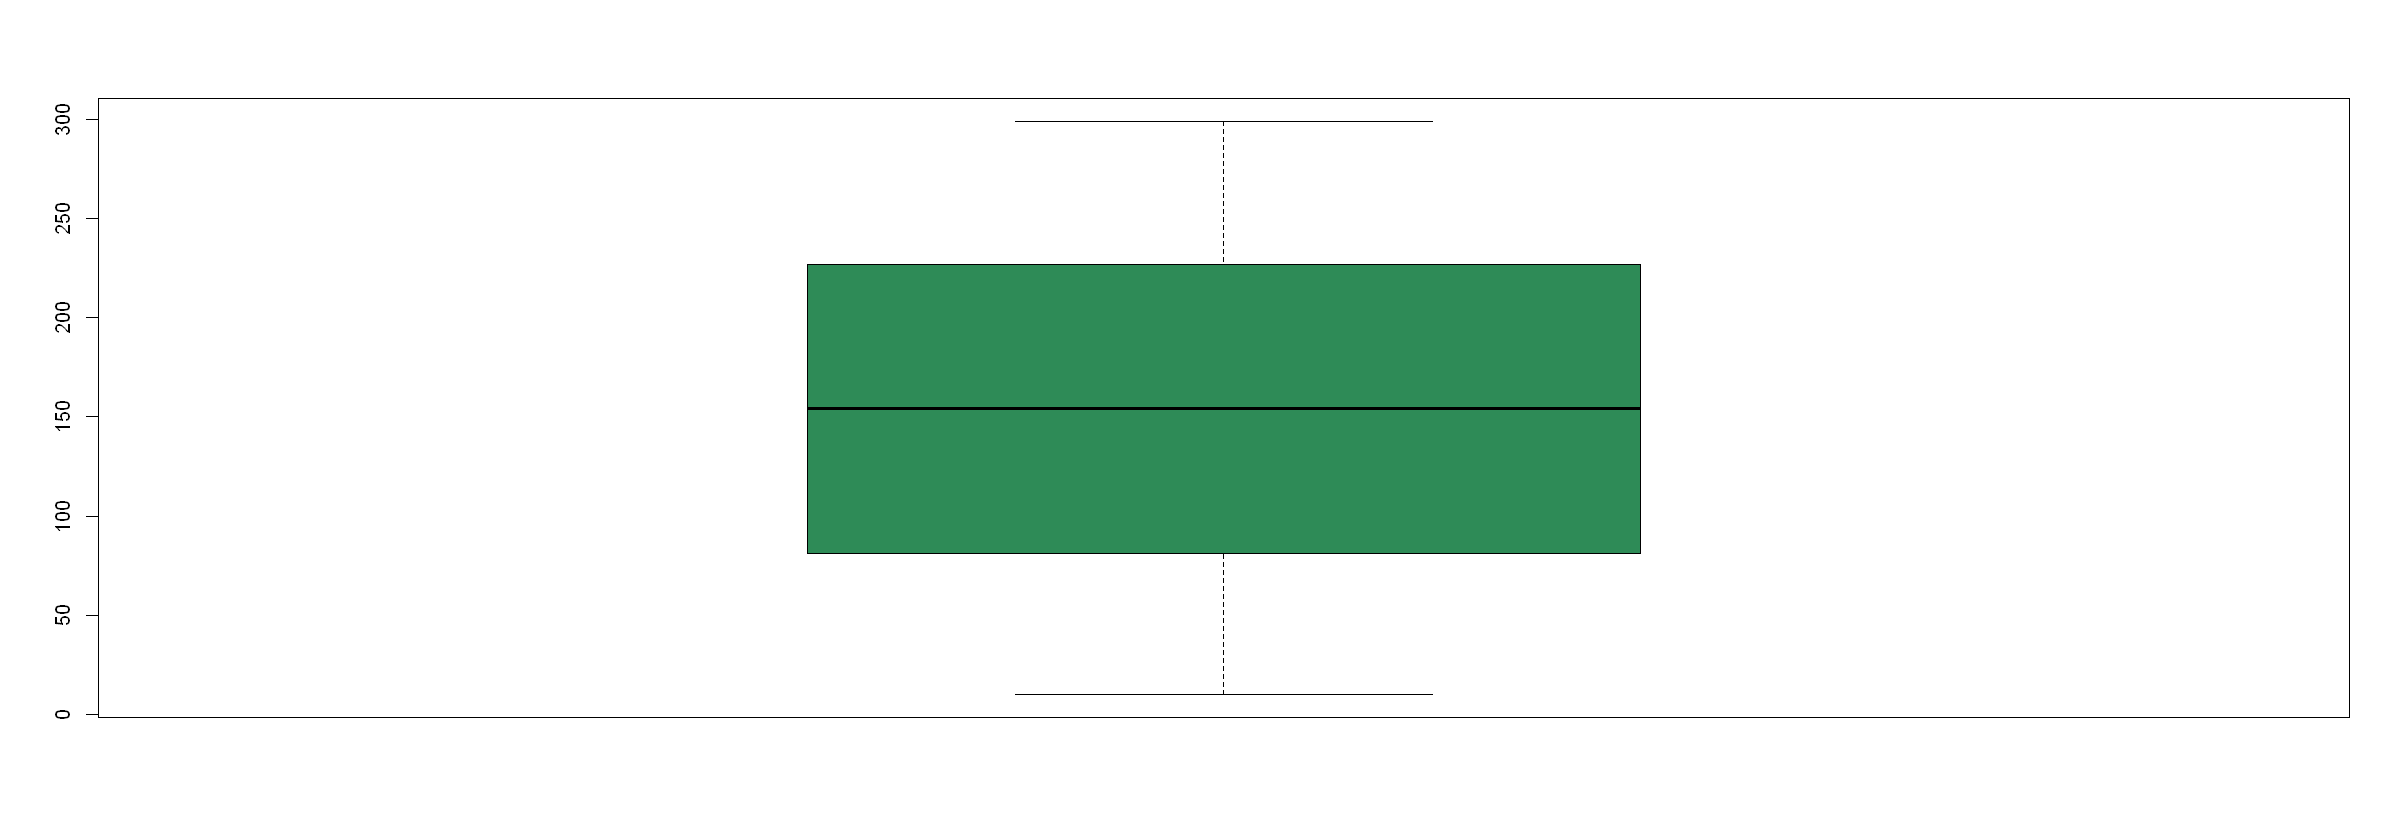

In [13]:
options(repr.plot.width=20,repr.plot.height=7)
for (i in Num.vars) {
    print(colnames(data)[i])
    boxplot(data[,i],col="seagreen")
    
}

And now, the possible correlation that might occurr betwen this variables.

No apparent relationships in between numerical variables. Let's plot this correlation just in case:



In [14]:
round(cor(data[,Num.vars]),2)

,Age,Annual_Premium,Vintage
Age,1.00,0.07,0
Annual_Premium,0.07,1.00,0
Vintage,0.00,0.00,1


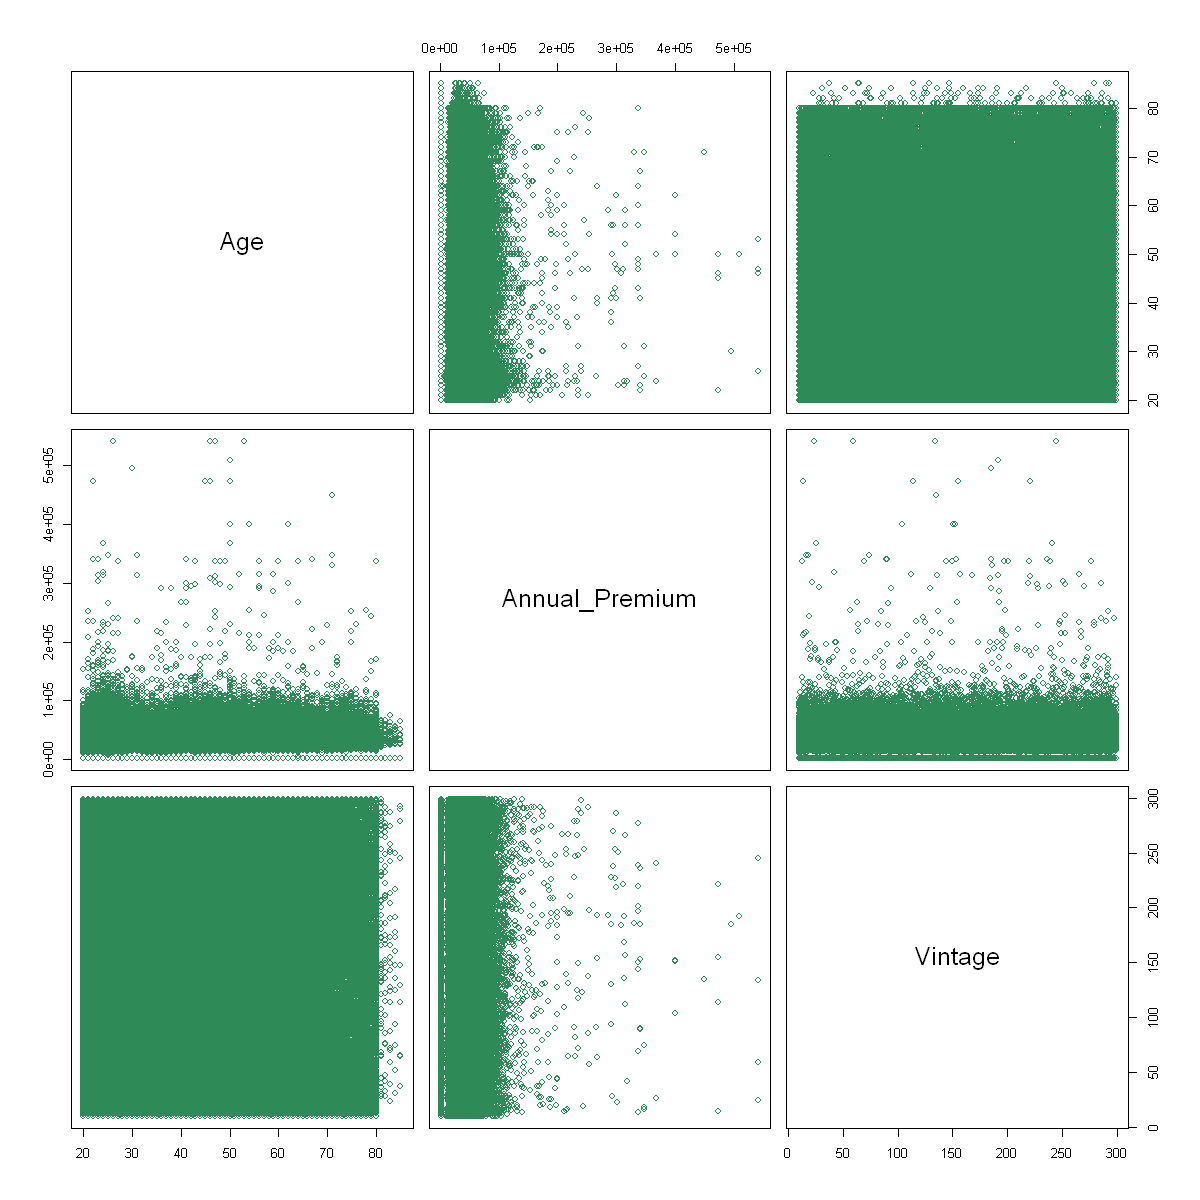

In [15]:
#Lasts 1 min 48 secs
options(repr.plot.width=10,repr.plot.height=10)
pairs(data[,Num.vars],col="seagreen")

Do we have to deal with null values in the dataset? No.

In [116]:
sum(is.na(data))
sum(is.na(test))

[1] 0

[1] 0

Let's look at this class imbalance we've been told:

In [117]:
table(data$Response)


     0      1 
319553  62601 

In [118]:
round(table(data$Response)/nrow(data)*100,2)


    0     1 
83.62 16.38 

Huge! Our first approach to deal with this problem is resampling with the function ``resample`` that we have below. It takes as parameter the amount of samples we want from each class and returns the filtered dataframe. 

In [7]:
resample <- function(data,size) {
    total = size * 2
    if (total > nrow(data)) {
        cat("Not enough data to create a dataframe of size ",total)
        return(data)
    } else if (size > 62601) {
        print("Not enough samples!")
        return(data)
    }
    negative <- sample(x=which(data$Response == 0), size=size, replace=FALSE)
    positive <- sample(x=which(data$Response == 1), size=size, replace=FALSE)
    resampled_idx <- c(negative, positive)
    return(data[resampled_idx, ])
}

In [8]:
df <- resample(data,700)
dim(df)
table(df$Response)

[1] 1400    9


  0   1 
700 700 

A common practice in Machine Learning is perform feature scaling, which helps most models to converge more quickly towards the minima. We can perform this method with the function ``scale``:

In [9]:
response <- df$Response
df <- df[,-(9:9),drop=FALSE]
df <- as.data.frame(scale(df))
df <- cbind(df, Response = response)
df[1:5,]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
323456,0.9094422,2.2574635,0.03780996,-0.655533,0.4518717,0.6959004,1.2715160,-0.87871820,0
135768,0.9094422,0.3905620,0.03780996,-0.655533,0.4518717,0.6959004,-1.4755992,-1.49751587,0
87575,0.9094422,-1.2609279,0.03780996,-0.655533,-1.3765108,0.6959004,0.7400316,0.33507724,0
153785,0.9094422,-0.7583005,0.03780996,-0.655533,-1.3765108,0.6959004,0.8776513,-0.01002146,0
118444,0.9094422,-1.3327318,0.03780996,1.524387,0.4518717,-1.4359608,-0.3936360,-0.25992052,0


In [ ]:
# install.packages("BayesPostEst")
# install.packages("rstanarm")

In [11]:
library("BayesPostEst")
library("rstanarm")

Warning message:
"package 'BayesPostEst' was built under R version 4.0.5"
Warning message:
"package 'rstanarm' was built under R version 4.0.5"
Loading required package: Rcpp

This is rstanarm version 2.21.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())



In [58]:
colnames(df)

[1] "Gender"             "Age"                "Driving_License"   
[4] "Previously_Insured" "Vehicle_Age"        "Vehicle_Damage"    
[7] "Annual_Premium"     "Vintage"            "Response"

In [12]:
fit.rstanarm <- stan_glm(Response ~ Gender + Age + Driving_License + Previously_Insured + 
                         Vehicle_Age + Vehicle_Damage + Annual_Premium + Vintage,
                            data = df, family = binomial(link = "logit"),
                            prior = normal(0, 3),
                            prior_intercept = normal(0, 3),
                            chains = 4, 
                            iter = 2000,
                            seed = 123)


SAMPLING FOR MODEL 'bernoulli' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 7.864 seconds (Warm-up)
Chain 1:                8.489 seconds (Sampling)
Chain 1:                16.353 seconds

In [14]:
rhat <- summary(fit.rstanarm)[, "Rhat"]

In [19]:
as.data.frame(rhat)

,rhat
,<dbl>
(Intercept),1.0023211
Gender,0.9998698
Age,0.9995277
Driving_License,1.0027107
Previously_Insured,1.0012544
Vehicle_Age,0.9997627
Vehicle_Damage,1.0012603
Annual_Premium,1.0003056
Vintage,0.9998251


In [18]:
any(summary(fit.rstanarm)[, "Rhat"] > 1.1)

[1] FALSE

In [20]:
mcmcTab(fit.rstanarm)

Variable,Median,SD,Lower,Upper
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.439,0.354,-2.322,-0.906
Gender,0.158,0.077,0.009,0.310
Age,-0.516,0.111,-0.736,-0.292
Driving_License,1.869,1.833,-0.001,6.911
Previously_Insured,-1.894,0.522,-3.167,-1.095
Vehicle_Age,0.848,0.124,0.615,1.100
Vehicle_Damage,1.603,0.240,1.192,2.133
Annual_Premium,-0.064,0.083,-0.228,0.098
Vintage,-0.030,0.077,-0.182,0.123


In [21]:
mcmcTab(fit.rstanarm, Pr = TRUE)

Variable,Median,SD,Lower,Upper,Pr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.439,0.354,-2.322,-0.906,1.000
Gender,0.158,0.077,0.009,0.310,0.981
Age,-0.516,0.111,-0.736,-0.292,1.000
Driving_License,1.869,1.833,-0.001,6.911,0.975
Previously_Insured,-1.894,0.522,-3.167,-1.095,1.000
Vehicle_Age,0.848,0.124,0.615,1.100,1.000
Vehicle_Damage,1.603,0.240,1.192,2.133,1.000
Annual_Premium,-0.064,0.083,-0.228,0.098,0.785
Vintage,-0.030,0.077,-0.182,0.123,0.651


In [41]:
mcmcTab(fit.rstanarm, pars = c("b[2]", "b[3]", "b[4]"), ROPE = c(-0.1, 0.1))

ERROR: Error in sims[, pars]: subscript out of bounds


In [31]:
mcmcmat.rstanarm <- as.matrix(fit.rstanarm)

In [33]:
mm <- model.matrix(Response ~ Gender + Age + Driving_License + Previously_Insured + 
                         Vehicle_Age + Vehicle_Damage + Annual_Premium + Vintage,
                   data = df)

In [34]:
aveprob.Gender.rstanarm <- mcmcAveProb(modelmatrix = mm,
            mcmcout = mcmcmat.rstanarm[, 1:ncol(mm)],
            xcol = 1,
            xrange = c(0, 1),
            link = "logit",
            ci = c(0.025, 0.975),
            fullsims = TRUE)

Picking joint bandwidth of 0.00288



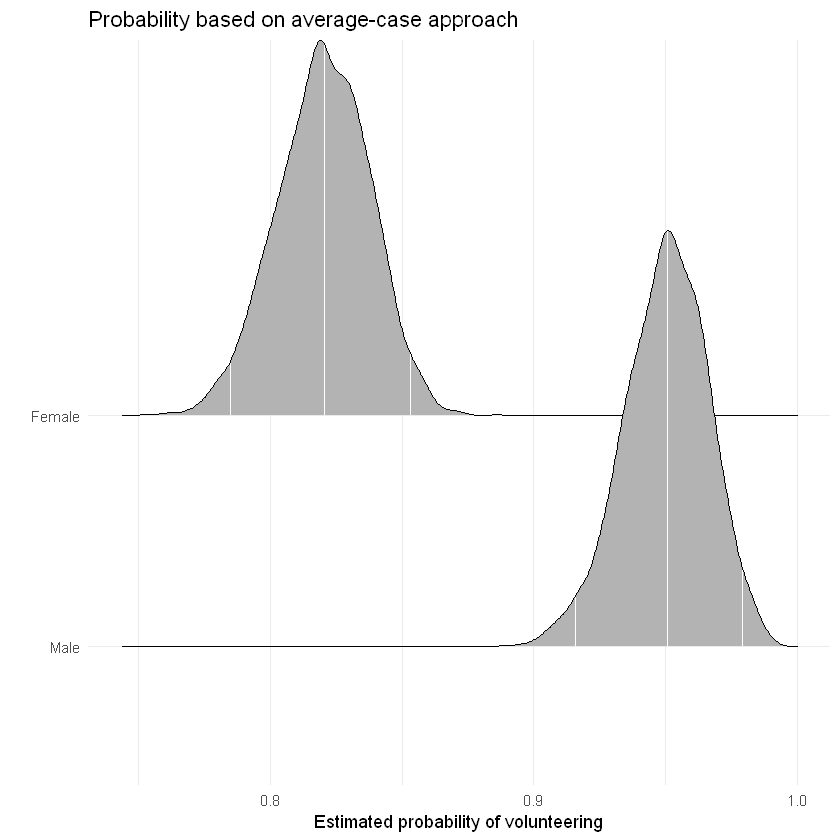

In [35]:
library("ggplot2")
library("ggridges")
ggplot(data = aveprob.Gender.rstanarm, 
       aes(y = factor(x), x = pp)) + 
  stat_density_ridges(quantile_lines = TRUE, 
                quantiles = c(0.025, 0.5, 0.975), vline_color = "white") + 
  scale_y_discrete(labels = c("Male", "Female")) + 
  ylab("") + 
  xlab("Estimated probability of volunteering") + 
  labs(title = "Probability based on average-case approach") +
  theme_minimal()

In [28]:
colnames(df)

[1] "Gender"             "Age"                "Driving_License"   
[4] "Previously_Insured" "Vehicle_Age"        "Vehicle_Damage"    
[7] "Annual_Premium"     "Vintage"            "Response"

In [36]:
aveprob.Vehicle_Damage.rstanarm <- mcmcAveProb(modelmatrix = mm,
            mcmcout = mcmcmat.rstanarm[, 1:ncol(mm)],
            xcol = 6,
            xrange = seq(min(df$Vehicle_Damage), max(df$Vehicle_Damage), length.out = 20),
            link = "logit",
            ci = c(0.025, 0.975),
            fullsims = FALSE)

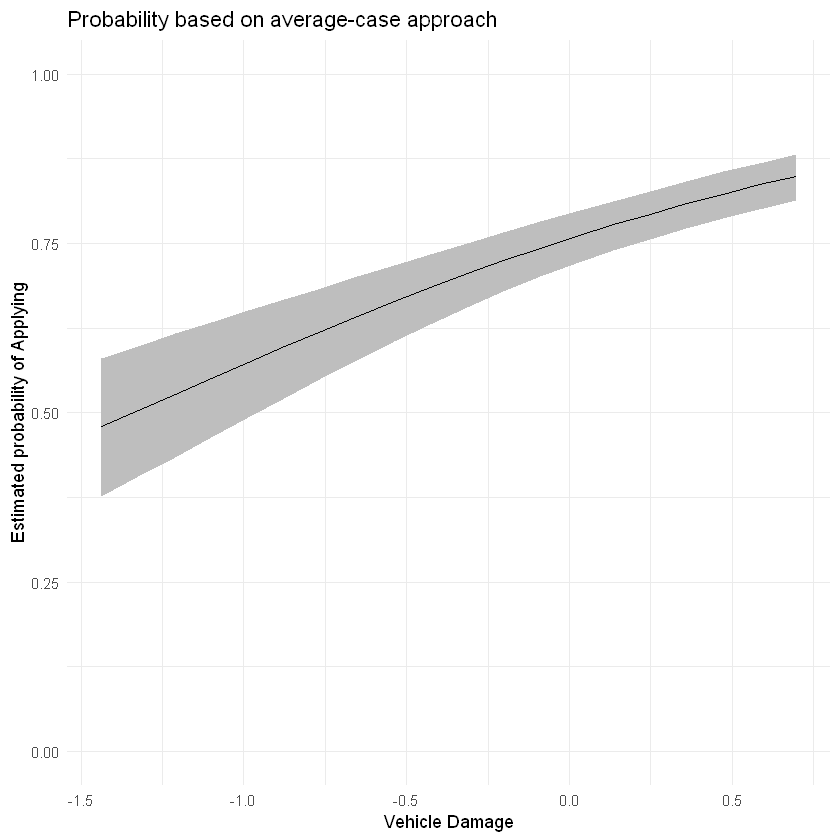

In [37]:
ggplot(data = aveprob.Vehicle_Damage.rstanarm, 
       aes(x = x, y = median_pp)) + 
  geom_ribbon(aes(ymin = lower_pp, ymax = upper_pp), fill = "gray") + 
  geom_line() + 
  xlab("Vehicle Damage") + 
  ylab("Estimated probability of Applying") + 
  ylim(0, 1) + 
  labs(title = "Probability based on average-case approach") +
  theme_minimal()

In [38]:
fdfull.rstanarm <- mcmcFD(modelmatrix = mm,
                  mcmcout = mcmcmat.rstanarm[, 1:ncol(mm)],
                  link = "logit",
                  ci = c(0.025, 0.975),
                  fullsims = TRUE)
summary(fdfull.rstanarm)

     Gender              Age           Driving_License Previously_Insured
 Min.   :-0.02588   Min.   :-0.17412   Min.   :0       Min.   :-0.8594   
 1st Qu.: 0.03410   1st Qu.:-0.12476   1st Qu.:0       1st Qu.:-0.7860   
 Median : 0.05121   Median :-0.11144   Median :0       Median :-0.7499   
 Mean   : 0.05142   Mean   :-0.11085   Mean   :0       Mean   :-0.7303   
 3rd Qu.: 0.06813   3rd Qu.:-0.09778   3rd Qu.:0       3rd Qu.:-0.6947   
 Max.   : 0.15542   Max.   :-0.01500   Max.   :0       Max.   :-0.2403   
  Vehicle_Age     Vehicle_Damage   Annual_Premium         Vintage         
 Min.   :0.1503   Min.   :0.3954   Min.   :-0.044738   Min.   :-0.097505  
 1st Qu.:0.2925   1st Qu.:0.6490   1st Qu.:-0.014364   1st Qu.:-0.019902  
 Median :0.3267   Median :0.6884   Median :-0.007563   Median :-0.007273  
 Mean   :0.3282   Mean   :0.6832   Mean   :-0.007737   Mean   :-0.007379  
 3rd Qu.:0.3635   3rd Qu.:0.7242   3rd Qu.:-0.001190   3rd Qu.: 0.005485  
 Max.   :0.5251   Max.   :0.8363

In [39]:
fdsum.rstanarm <- mcmcFD(modelmatrix = mm,
                  mcmcout = mcmcmat.rstanarm[, 1:ncol(mm)],
                  link = "logit",
                  ci = c(0.025, 0.975),
                  fullsims = FALSE)
summary(fdsum.rstanarm)

   median_fd            lower_fd           upper_fd          VarName         
 Min.   :-0.749892   Min.   :-0.82788   Min.   :-0.52481   Length:8          
 1st Qu.:-0.033531   1st Qu.:-0.07185   1st Qu.:-0.01706   Class :character  
 Median :-0.003637   Median :-0.01372   Median : 0.02091   Mode  :character  
 Mean   : 0.023767   Mean   :-0.03293   Mean   : 0.09480                     
 3rd Qu.: 0.120074   3rd Qu.: 0.05961   3rd Qu.: 0.18374                     
 Max.   : 0.688421   Max.   : 0.55511   Max.   : 0.77816                     
     VarID     
 Min.   :1.00  
 1st Qu.:2.75  
 Median :4.50  
 Mean   :4.50  
 3rd Qu.:6.25  
 Max.   :8.00  

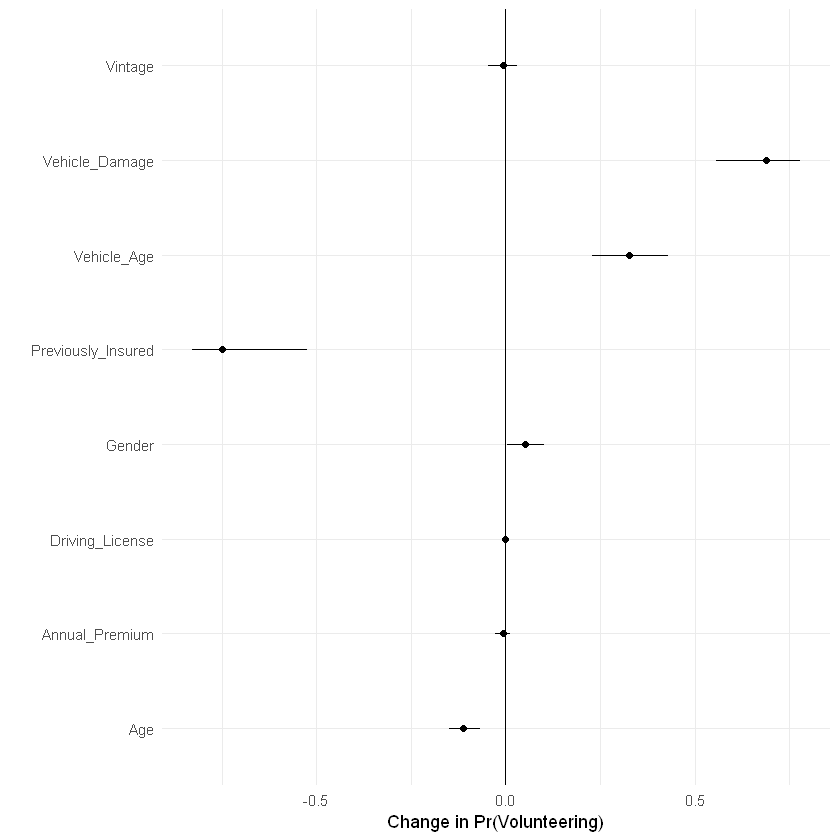

In [40]:
ggplot(data = fdsum.rstanarm, 
       aes(x = median_fd, y = VarName)) + 
  geom_point() + 
  geom_segment(aes(x = lower_fd, xend = upper_fd, yend = VarName)) + 
  geom_vline(xintercept = 0) + 
  xlab("Change in Pr(Volunteering)") + 
  ylab("") +
  theme_minimal()

In [42]:
fitstats <- mcmcRocPrc(object = fit.rstanarm,
                       yname  = "Response",
                       xnames = c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age',
                                  'Vehicle_Damage','Annual_Premium','Vintage'),
                       curves = TRUE,
                       fullsims = FALSE)

Instead of posterior_linpred(..., transform=TRUE) please call posterior_epred(), which provides equivalent functionality.



In [43]:
fitstats$area_under_roc

V1 
0.8824245

In [44]:
fitstats$area_under_prc

V1 
0.8208594

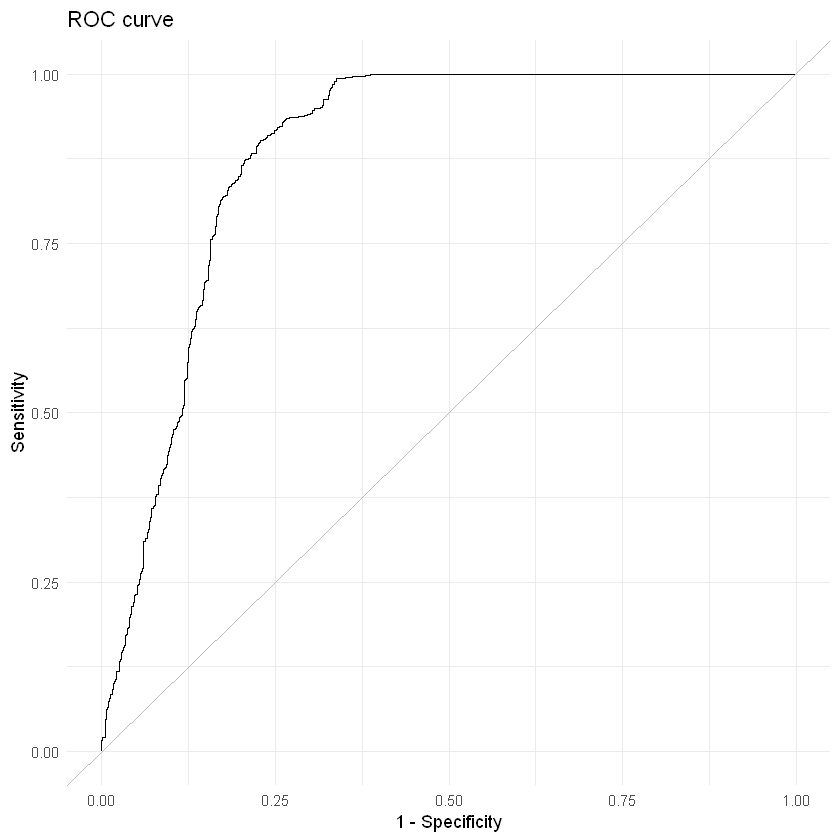

In [45]:
ggplot(data = as.data.frame(fitstats, what = "roc"), aes(x = x, y = y)) +
  geom_line() + 
  geom_abline(intercept = 0, slope = 1, color = "gray") + 
  labs(title = "ROC curve") + 
  xlab("1 - Specificity") + 
  ylab("Sensitivity") +
  theme_minimal()

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


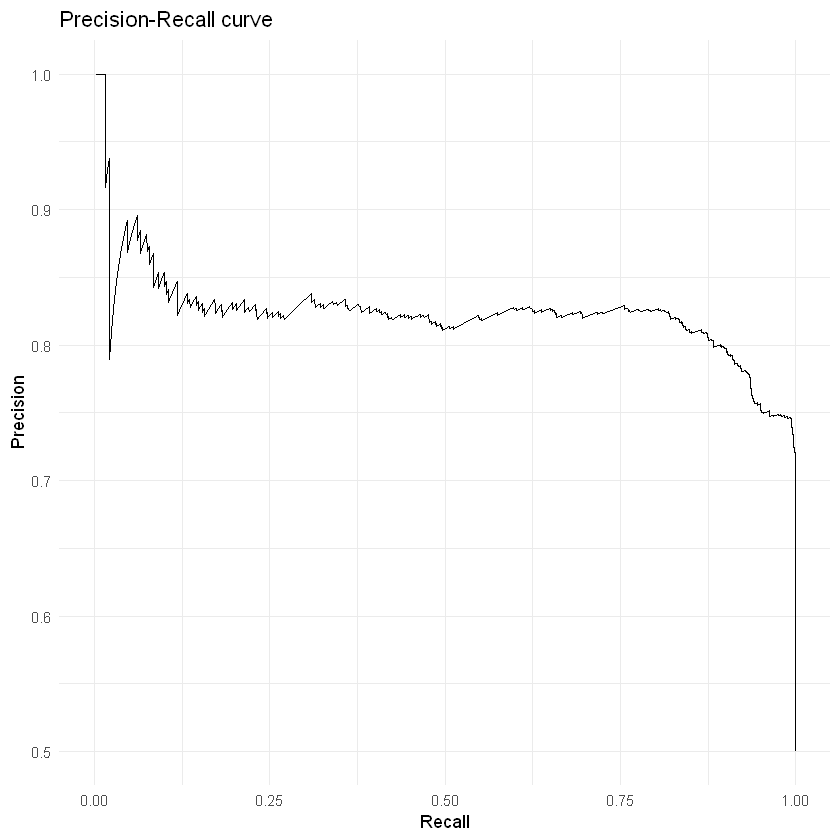

In [46]:
ggplot(data = as.data.frame(fitstats, what = "prc"), aes(x = x, y = y)) +
  geom_line() + 
  labs(title = "Precision-Recall curve") + 
  xlab("Recall") + 
  ylab("Precision") +
  theme_minimal()

In [49]:
fitstats.fullsims <- mcmcRocPrc(object = fit.rstanarm,
                       yname  = "Response",
                       xnames = c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age',
                                  'Vehicle_Damage','Annual_Premium','Vintage'),
                       curves = FALSE,
                       fullsims = FALSE)

Instead of posterior_linpred(..., transform=TRUE) please call posterior_epred(), which provides equivalent functionality.



Warning message:
"Groups with fewer than two data points have been dropped."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


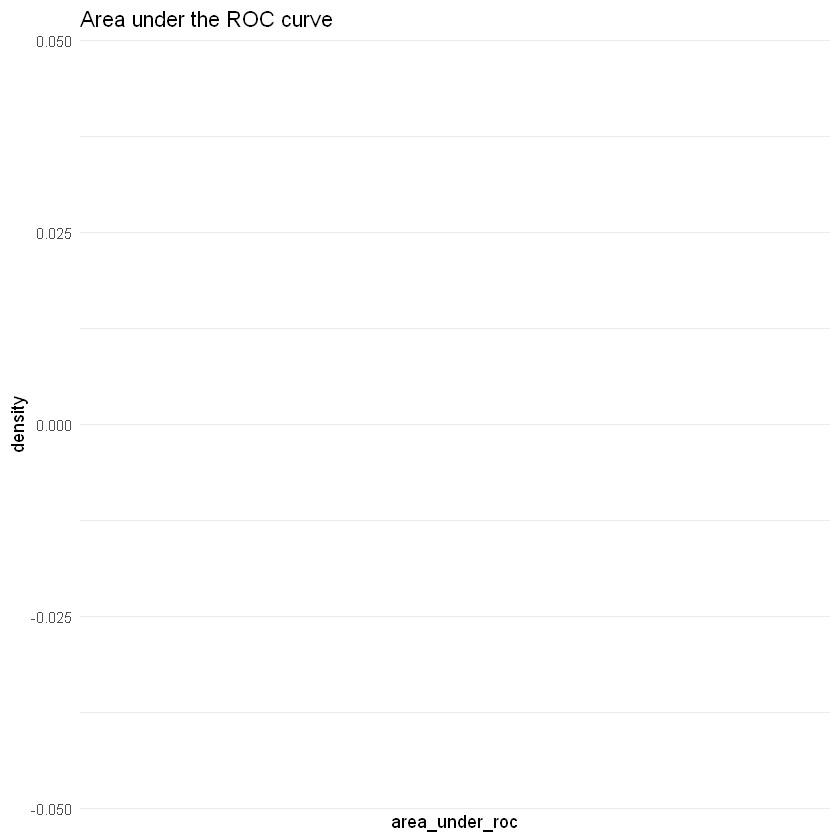

In [50]:
ggplot(as.data.frame(fitstats.fullsims), 
       aes(x = area_under_roc)) +
  geom_density() +
  labs(title = "Area under the ROC curve") +
  theme_minimal()

In [9]:
library("carData")

In [10]:
df <- carData::Cowles

In [11]:
df$female <- (as.numeric(df$sex) - 2) * (-1)
df$volunteer <- as.numeric(df$volunteer) - 1
df$extraversion <- (df$extraversion - mean(df$extraversion)) / (2 * sd(df$extraversion))
df$neuroticism <- (df$neuroticism - mean(df$neuroticism)) / (2 * sd(df$neuroticism))

In [12]:
dim(df)

[1] 1421    5

In [13]:
df[1:10,]

,neuroticism,extraversion,sex,volunteer,female
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,0.46231843,0.08051795,female,0,1
2,-0.35415445,0.20893098,male,0,0
3,-0.66033178,0.46575703,male,0,0
4,-0.35415445,0.97940914,female,0,1
5,-0.25209534,0.85099611,male,0,0
6,-0.55827267,0.33734400,male,0,0
7,-0.35415445,-0.30472113,female,0,1
8,0.05408199,-0.17630810,male,0,0
9,0.36025932,0.46575703,male,0,0


In [14]:
fit.rstanarm <- stan_glm(volunteer ~ female + neuroticism + extraversion, 
                          data = df, family = binomial(link = "logit"),
                         prior = normal(0, 3),
                         prior_intercept = normal(0, 3),
                         chains = 4, 
                         iter = 2000,
                         seed = 123)


SAMPLING FOR MODEL 'bernoulli' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.577 seconds (Warm-up)
Chain 1:                0.671 seconds (Sampling)
Chain 1:                1.248 seconds 